In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("LoanStats.csv")

In [3]:
data.head()

int_rate  loan_amnt  term grade home_ownership  annual_inc         purpose
0     10.65       5000    36     B           RENT     24000.0     credit_card
1     15.27       2500    60     C           RENT     30000.0             car
2     15.96       2400    36     C           RENT     12252.0  small_business
3     13.49      10000    36     C           RENT     49200.0           other
4     12.69       3000    60     B           RENT     80000.0           other

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39786 entries, 0 to 39785
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   int_rate        39786 non-null  float64
 1   loan_amnt       39786 non-null  int64  
 2   term            39786 non-null  int64  
 3   grade           39786 non-null  object 
 4   home_ownership  39786 non-null  object 
 5   annual_inc      39786 non-null  float64
 6   purpose         39786 non-null  object 
dtypes: float64(2), int64(2), object(3)
memory usage: 2.1+ MB


In [5]:
data.describe()

int_rate     loan_amnt          term    annual_inc
count  39786.000000  39786.000000  39786.000000  3.978600e+04
mean      12.027873  11231.360277     42.448499  6.897907e+04
std        3.727466   7464.542832     10.638782  6.376263e+04
min        5.420000    500.000000     36.000000  4.000000e+03
25%        9.250000   5500.000000     36.000000  4.050000e+04
50%       11.860000  10000.000000     36.000000  5.900000e+04
75%       14.590000  15000.000000     60.000000  8.234250e+04
max       24.590000  35000.000000     60.000000  6.000000e+06

In [6]:
data.int_rate.value_counts()

10.99    958
13.49    831
11.49    826
7.51     787
7.88     725
        ... 
18.36      1
16.96      1
16.15      1
16.01      1
17.44      1
Name: int_rate, Length: 371, dtype: int64

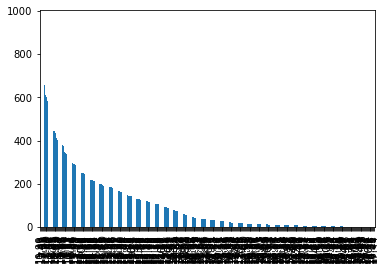

In [7]:
data.int_rate.value_counts().plot(kind = 'bar')
plt.show()

In [8]:
import seaborn as sns

<AxesSubplot:xlabel='int_rate', ylabel='Count'>

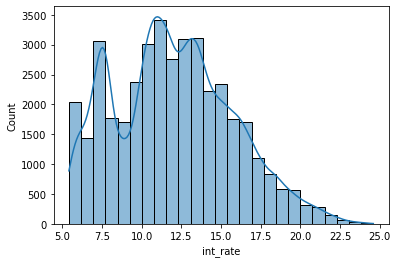

In [9]:
sns.histplot(data=data,x="int_rate",kde=True,bins=25)


<AxesSubplot:xlabel='count', ylabel='int_rate'>

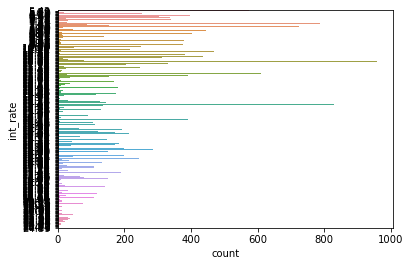

In [10]:
sns.countplot(y=data["int_rate"])

In [11]:
# exploring missing values

In [12]:
data.isnull().sum()

int_rate          0
loan_amnt         0
term              0
grade             0
home_ownership    0
annual_inc        0
purpose           0
dtype: int64

Text(0.5, 1.0, 'Heatmap for the Data')

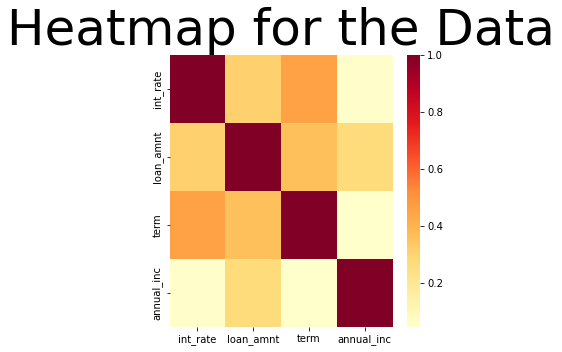

In [13]:
# exploring correlation
# Heatmap for correlation
plt.rcParams['figure.figsize'] = (5,5)
sns.heatmap(data.corr(),cmap="YlOrRd")
plt.title('Heatmap for the Data', fontsize = 50)

In [14]:
data['grade'].unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [15]:
data['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [16]:
data['purpose'].unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

In [17]:
non_numeric_features = ['grade','home_ownership','purpose']

In [18]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for feature in non_numeric_features:
    data[feature] = le.fit_transform(data[feature])

In [19]:
data

int_rate  loan_amnt  term  grade  home_ownership  annual_inc  purpose
0         10.65       5000    36      1               4     24000.0        1
1         15.27       2500    60      2               4     30000.0        0
2         15.96       2400    36      2               4     12252.0       11
3         13.49      10000    36      2               4     49200.0        9
4         12.69       3000    60      1               4     80000.0        9
...         ...        ...   ...    ...             ...         ...      ...
39781      8.07       2500    36      0               0    110000.0        4
39782     10.28       8500    36      2               4     18000.0        1
39783      8.07       5000    36      0               0    100000.0        2
39784      7.43       5000    36      0               0    200000.0        9
39785     13.75       7500    36      4               3     22000.0        2

[39786 rows x 7 columns]

In [20]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
cat_features = ['grade','home_ownership','purpose']
encoded_features=[]
for feature in cat_features:
    encoded_feat = enc.fit_transform(data[feature].values.reshape(-1,1)).toarray()
    n = data[feature].nunique()
    cols = ['{}_{}'.format(feature,n) for n in range (1,n+1)]
    enc_df = pd.DataFrame(encoded_feat,columns=cols)
    enc_df.index = data.index
    encoded_features.append(enc_df)
    
data = pd.concat([data, *encoded_features],axis = 1)


In [21]:
data

int_rate  loan_amnt  term  grade  home_ownership  annual_inc  purpose  \
0         10.65       5000    36      1               4     24000.0        1   
1         15.27       2500    60      2               4     30000.0        0   
2         15.96       2400    36      2               4     12252.0       11   
3         13.49      10000    36      2               4     49200.0        9   
4         12.69       3000    60      1               4     80000.0        9   
...         ...        ...   ...    ...             ...         ...      ...   
39781      8.07       2500    36      0               0    110000.0        4   
39782     10.28       8500    36      2               4     18000.0        1   
39783      8.07       5000    36      0               0    100000.0        2   
39784      7.43       5000    36      0               0    200000.0        9   
39785     13.75       7500    36      4               3     22000.0        2   

       grade_1  grade_2  grade_3  ...  purpose_5  purpose_6  purpose_7  \
0          0.0      1.0      0.0  ...        0.0        0.0        0.0   
1          0.0      0.0      1.0  ...        0.0        0.0        0.0   
2          0.0      0.0      1.0  ...        0.0        0.0        0.0   
3          0.0      0.0      1.0  ...        0.0        0.0        0.0   
4          0.0      1.0      0.0  ...        0.0        0.0        0.0   
...        ...      ...      ...  ...        ...        ...        ...   
39781      1.0      0.0      0.0  ...        1.0        0.0        0.0   
39782      0.0      0.0      1.0  ...        0.0        0.0        0.0   
39783      1.0      0.0      0.0  ...        0.0        0.0        0.0   
39784      1.0      0.0      0.0  ...        0.0        0.0        0.0   
39785      0.0      0.0      0.0  ...        0.0        0.0        0.0   

       purpose_8  purpose_9  purpose_10  purpose_11  purpose_12  purpose_13  \
0            0.0        0.0         0.0         0.0         0.0         0.0   
1            0.0        0.0         0.0         0.0         0.0         0.0   
2            0.0        0.0         0.0         0.0         1.0         0.0   
3            0.0        0.0         1.0         0.0         0.0         0.0   
4            0.0        0.0         1.0         0.0         0.0         0.0   
...          ...        ...         ...         ...         ...         ...   
39781        0.0        0.0         0.0         0.0         0.0         0.0   
39782        0.0        0.0         0.0         0.0         0.0         0.0   
39783        0.0        0.0         0.0         0.0         0.0         0.0   
39784        0.0        0.0         1.0         0.0         0.0         0.0   
39785        0.0        0.0         0.0         0.0         0.0         0.0   

       purpose_14  
0             0.0  
1             0.0  
2             0.0  
3             0.0  
4             0.0  
...           ...  
39781         0.0  
39782         0.0  
39783         0.0  
39784         0.0  
39785         0.0  

[39786 rows x 33 columns]

In [22]:
drop_col = ['grade','home_ownership','purpose','int_rate']

In [23]:
# from sklearn.preprocessing import StandardScaler
# X = StandardScaler().fit_transform(data.drop(columns=drop_col))
# y = data['int_rate']
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)


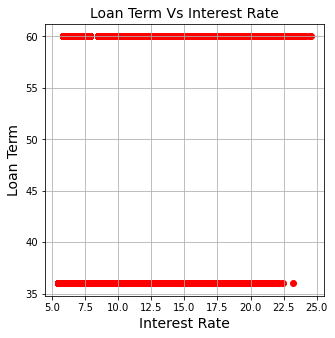

In [24]:
plt.scatter(data['int_rate'], data['term'], color='red')
plt.title('Loan Term Vs Interest Rate', fontsize=14)
plt.xlabel('Interest Rate', fontsize=14)
plt.ylabel('Loan Term', fontsize=14)
plt.grid(True)
plt.show()

In [25]:
# import pandas as pd
# import matplotlib.pyplot as plt

# data1 = {'year': [2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016],
#         'month': [12,11,10,9,8,7,6,5,4,3,2,1,12,11,10,9,8,7,6,5,4,3,2,1],
#         'interest_rate': [2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,2,2,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75],
#         'unemployment_rate': [5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.5,5.6,5.7,5.9,6,5.9,5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1],
#         'index_price': [1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,1047,965,943,958,971,949,884,866,876,822,704,719]        
#         }

# df = pd.DataFrame(data1)

# plt.scatter(df['interest_rate'], df['index_price'], color='red')
# plt.title('Index Price Vs Interest Rate', fontsize=14)
# plt.xlabel('Interest Rate', fontsize=14)
# plt.ylabel('Index Price', fontsize=14)
# plt.grid(True)
# plt.show()

In [26]:
# # drop_col = ['grade','home_ownership','purpose']
# # from sklearn.preprocessing import StandardScaler
# # X = StandardScaler().fit_transform(data.drop(columns=drop_col))
# # y = data['int_rate']
# # from sklearn.model_selection import train_test_split
# # X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)
# import pandas as pd
# from sklearn import linear_model
# import statsmodels.api as sm

# data = {'year': [2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016],
#         'month': [12,11,10,9,8,7,6,5,4,3,2,1,12,11,10,9,8,7,6,5,4,3,2,1],
#         'interest_rate': [2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,2,2,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75],
#         'unemployment_rate': [5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.5,5.6,5.7,5.9,6,5.9,5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1],
#         'index_price': [1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,1047,965,943,958,971,949,884,866,876,822,704,719]        
#         }

# df = pd.DataFrame(data)
# x = df[['interest_rate','unemployment_rate']]
# y = df['index_price']
 
# # with sklearn
# regr = linear_model.LinearRegression()
# regr.fit(x, y)

# print('Intercept: \n', regr.intercept_)
# print('Coefficients: \n', regr.coef_)

# # with statsmodels
# x = sm.add_constant(x) # adding a constant
 
# model = sm.OLS(y, x).fit()
# predictions = model.predict(x) 
 
# print_model = model.summary()
# print(print_model)

In [27]:
X = data.drop(columns=drop_col)
y = data['int_rate']

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [29]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()  
mlr.fit(x_train, y_train)

LinearRegression()

In [30]:
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(X, mlr.coef_))

Intercept:  14.094161803848419
Coefficients:


[('loan_amnt', 1.4603943005451098e-05),
 ('term', 0.017867428988544393),
 ('annual_inc', 1.2800946209473166e-07),
 ('grade_1', -7.600554204422875),
 ('grade_2', -4.056414177387539),
 ('grade_3', -1.5509159889115227),
 ('grade_4', 0.5741770583640359),
 ('grade_5', 2.3591652478948975),
 ('grade_6', 4.327268320335382),
 ('grade_7', 5.9472737441136525),
 ('home_ownership_1', -0.012160917426025743),
 ('home_ownership_2', -0.40076818241293966),
 ('home_ownership_3', 0.25155703678821634),
 ('home_ownership_4', 0.07817949468410718),
 ('home_ownership_5', 0.08319256839147465),
 ('purpose_1', -0.16890391642933303),
 ('purpose_2', 0.06354241166392159),
 ('purpose_3', 0.03720398020331952),
 ('purpose_4', 0.1930241179969868),
 ('purpose_5', -0.011020569584082039),
 ('purpose_6', 0.054051052354254926),
 ('purpose_7', -0.07991243311450633),
 ('purpose_8', -0.05471165042588955),
 ('purpose_9', 0.0981151843591701),
 ('purpose_10', 0.1164243132143033),
 ('purpose_11', -0.07842931004284318),
 ('purpose_1

In [31]:
#Prediction of test set
y_pred_mlr= mlr.predict(x_test)
#Predicted values
print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [ 7.31790227 17.84816605 17.18850193 ... 10.95280515 13.39828449
  7.03553602]


In [32]:
#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff['no'] = range(1, len(mlr_diff) + 1)
mlr_diff.head(10)

Actual value  Predicted value  no
22900          5.79         7.317902   1
27960         17.93        17.848166   2
32773         16.45        17.188502   3
16463         10.74        11.241612   4
22822         14.46        15.948356   5
12833          5.42         7.016469   6
17036          7.66         7.230986   7
29184         16.82        17.792880   8
30104         10.99        10.984300   9
26804          7.14         7.086771  10

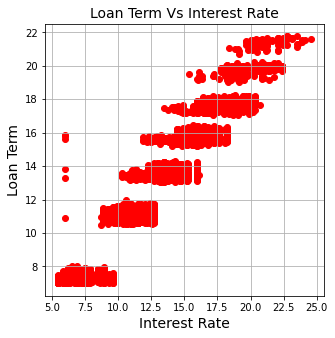

In [33]:
plt.scatter(mlr_diff['Actual value'], mlr_diff['Predicted value'], color='red')
plt.title('Loan Term Vs Interest Rate', fontsize=14)
plt.xlabel('Interest Rate', fontsize=14)
plt.ylabel('Loan Term', fontsize=14)
plt.grid(True)
plt.show()

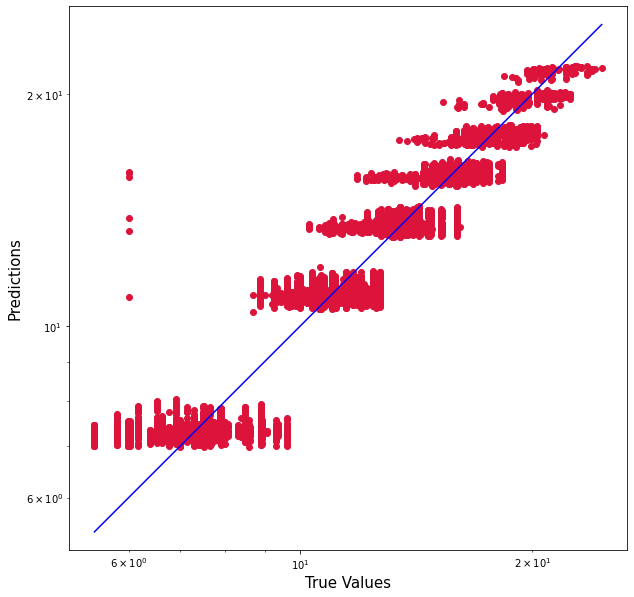

In [34]:
plt.figure(figsize=(10,10))
plt.scatter(mlr_diff['Actual value'], mlr_diff['Predicted value'], c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(mlr_diff['Predicted value']), max(mlr_diff['Actual value']))
p2 = min(min(mlr_diff['Predicted value']), min(mlr_diff['Actual value']))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

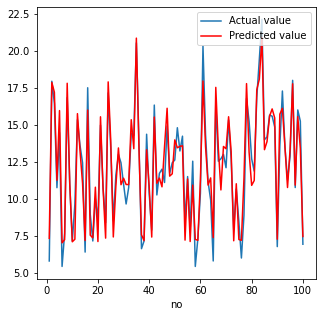

In [35]:
import matplotlib.pyplot as plt
import pandas as pd

# gca stands for 'get current axis'
ax = plt.gca()
mlr_diff1 = mlr_diff[:100]
mlr_diff1.plot(kind='line',x='no',y='Actual value',ax=ax)
mlr_diff1.plot(kind='line',x='no',y='Predicted value', color='red', ax=ax)

plt.show()

In [36]:
#Model Evaluation
from sklearn import metrics
import numpy as np
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
print('R squared: {:.2f}'.format(mlr.score(X,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 92.47
Mean Absolute Error: 0.8142926374445161
Mean Square Error: 1.0611648491911965
Root Mean Square Error: 1.0301285595454561


In [37]:
mlr.get_params(deep=True)

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [38]:
from sklearn.model_selection import cross_val_score
# function to get cross validation scores
def get_cv_scores(model):
    scores = cross_val_score(model,
                             x_train,
                             y_train,
                             cv=5,
                             scoring='r2')
    
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')

In [39]:
from sklearn.linear_model import LinearRegression
# Train model
lr = LinearRegression().fit(x_train, y_train)
# get cross val scores
get_cv_scores(lr)

CV Mean:  0.9249794631518776
STD:  0.002541608124276271




In [40]:
from sklearn.linear_model import Ridge
# Train model with default alpha=1
ridge = Ridge(alpha=1).fit(x_train, y_train)
# get cross val scores
get_cv_scores(ridge)

CV Mean:  0.9249841700922612
STD:  0.002544922009991656




In [39]:
# find optimal alpha with grid search
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)
grid = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(x_train, y_train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

NameError: name 'GridSearchCV' is not defined

In [40]:
from sklearn.linear_model import Lasso
# Train model with default alpha=1
lasso = Lasso(alpha=1).fit(x_train, y_train)
# get cross val scores
get_cv_scores(lasso)    

CV Mean:  0.22729777454920183
STD:  0.010529815028104178




In [41]:
# find optimal alpha with grid search
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)
grid = GridSearchCV(estimator=lasso, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(x_train, y_train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

NameError: name 'GridSearchCV' is not defined

In [42]:
# match column names to coefficients
for coef, col in enumerate(x_train.columns):
    print(f'{col}:  {lasso.coef_[coef]}')

loan_amnt:  8.817951274715979e-05
term:  0.1277885988419791
annual_inc:  -6.926068404931487e-07
grade_1:  -0.0
grade_2:  -0.0
grade_3:  0.0
grade_4:  0.0
grade_5:  0.0
grade_6:  0.0
grade_7:  0.0
home_ownership_1:  -0.0
home_ownership_2:  -0.0
home_ownership_3:  0.0
home_ownership_4:  -0.0
home_ownership_5:  0.0
purpose_1:  -0.0
purpose_2:  -0.0
purpose_3:  0.0
purpose_4:  0.0
purpose_5:  -0.0
purpose_6:  -0.0
purpose_7:  -0.0
purpose_8:  -0.0
purpose_9:  0.0
purpose_10:  0.0
purpose_11:  -0.0
purpose_12:  0.0
purpose_13:  -0.0
purpose_14:  0.0


In [43]:
from sklearn.linear_model import ElasticNet
# Train model with default alpha=1 and l1_ratio=0.5
elastic_net = ElasticNet(alpha=1, l1_ratio=0.5).fit(x_train, y_train)
# get cross val scores
get_cv_scores(elastic_net)

CV Mean:  0.31445612721548344
STD:  0.0104050860065353




In [44]:
# find optimal alpha with grid search
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
l1_ratio = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
param_grid = dict(alpha=alpha, l1_ratio=l1_ratio)
grid = GridSearchCV(estimator=elastic_net, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(x_train, y_train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

NameError: name 'GridSearchCV' is not defined

In [45]:
# random forest regressor
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
# fit the regressor with x and y data
ranfor = regressor.fit(x_train, y_train)
# Y_pred = regressor.predict(np.array([6.5]).reshape(1, 1))  # test the output by changing values
# from sklearn.linear_model import Lasso
# # Train model with default alpha=1
# lasso = Lasso(alpha=1).fit(x_train, y_train)
# get cross val scores
get_cv_scores(ranfor)


CV Mean:  0.9157992315490248
STD:  0.003189066364506331




In [46]:
# random forest regressor
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.tree import DecisionTreeRegressor
  
 # create regressor object
regressor = DecisionTreeRegressor(random_state=0)
  
# fit the regressor with x and y data
dectree = regressor.fit(x_train, y_train)
# Y_pred = regressor.predict(np.array([6.5]).reshape(1, 1))  # test the output by changing values
# from sklearn.linear_model import Lasso
# # Train model with default alpha=1
# lasso = Lasso(alpha=1).fit(x_train, y_train)
# get cross val scores
get_cv_scores(dectree)

CV Mean:  0.8577605463967585
STD:  0.005367162480280663




In [47]:
from sklearn.neighbors import KNeighborsRegressor
# fit the regressor with x and y data
neigh = KNeighborsRegressor(n_neighbors=2)
knn = neigh.fit(x_train, y_train)
# Y_pred = regressor.predict(np.array([6.5]).reshape(1, 1))  # test the output by changing values
# from sklearn.linear_model import Lasso
# # Train model with default alpha=1
# lasso = Lasso(alpha=1).fit(x_train, y_train)
# get cross val scores
get_cv_scores(knn)

CV Mean:  -0.04413604591669262
STD:  0.025841704917607407




In [48]:
knn.get_params(deep=True)

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 2,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
# from sklearn.svm import SVR
# # fit the regressor with x and y data
# regr = SVR()
# svr = regr.fit(x_train, y_train)
# # Y_pred = regressor.predict(np.array([6.5]).reshape(1, 1))  # test the output by changing values
# # from sklearn.linear_model import Lasso
# # # Train model with default alpha=1
# # lasso = Lasso(alpha=1).fit(x_train, y_train)
# # get cross val scores
# get_cv_scores(svr)

In [58]:
# from sklearn.gaussian_process import GaussianProcessRegressor
# from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
# # fit the regressor with x and y data
# kernel = DotProduct() + WhiteKernel()
# gpr = GaussianProcessRegressor(kernel=kernel,random_state=0).fit(x_train, y_train)
# # Y_pred = regressor.predict(np.array([6.5]).reshape(1, 1))  # test the output by changing values
# # from sklearn.linear_model import Lasso
# # # Train model with default alpha=1
# # lasso = Lasso(alpha=1).fit(x_train, y_train)
# # get cross val scores
# get_cv_scores(gpr)

In [42]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [45]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

hidden_units1 = 160
hidden_units2 = 480
hidden_units3 = 256
learning_rate = 0.01
# Creating model using the Sequential in tensorflow
def build_model_using_sequential():
  model = Sequential([
    Dense(hidden_units1, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='linear')
  ])
  return model
# build the model
model = build_model_using_sequential()

In [48]:
from tensorflow.keras.losses import MeanSquaredLogarithmicError
from keras.optimizers import Adam

# loss function
msle = MeanSquaredLogarithmicError()
model.compile(
    loss=msle, 
    optimizer=Adam(learning_rate=learning_rate), 
    metrics=[msle]
)
# train the model
history = model.fit(
    x_train.values, 
    y_train.values, 
    epochs=10, 
    batch_size=64,
    validation_split=0.2
)

Epoch 1/10
349/349 [==============================] - 2s 4ms/step - loss: 6.4849 - mean_squared_logarithmic_error: 6.4826 - val_loss: 6.4717 - val_mean_squared_logarithmic_error: 6.4807
Epoch 2/10
349/349 [==============================] - 1s 3ms/step - loss: 6.4551 - mean_squared_logarithmic_error: 6.4545 - val_loss: 6.4717 - val_mean_squared_logarithmic_error: 6.4807
Epoch 3/10
349/349 [==============================] - 1s 3ms/step - loss: 6.4551 - mean_squared_logarithmic_error: 6.4539 - val_loss: 6.4717 - val_mean_squared_logarithmic_error: 6.4807
Epoch 4/10
349/349 [==============================] - 1s 3ms/step - loss: 6.4551 - mean_squared_logarithmic_error: 6.4551 - val_loss: 6.4717 - val_mean_squared_logarithmic_error: 6.4807
Epoch 5/10
349/349 [==============================] - 1s 3ms/step - loss: 6.4551 - mean_squared_logarithmic_error: 6.4556 - val_loss: 6.4717 - val_mean_squared_logarithmic_error: 6.4807
Epoch 6/10
349/349 [==============================] - 1s 3ms/step - lo

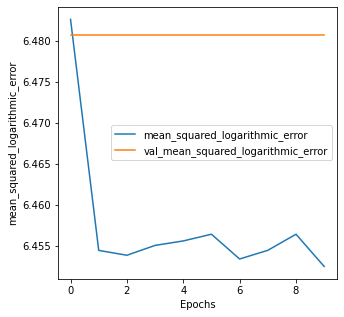

In [49]:
def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()
# Plot the history
plot_history(history, 'mean_squared_logarithmic_error')

In [50]:
x_test['prediction'] = model.predict(x_test)

373/373 [==============================] - 1s 1ms/step


In [51]:
x_test

loan_amnt  term  annual_inc  grade_1  grade_2  grade_3  grade_4  \
22900      10000    36     78000.0      1.0      0.0      0.0      0.0   
27960      20000    60     44304.0      0.0      0.0      0.0      0.0   
32773       4000    36     39456.0      0.0      0.0      0.0      0.0   
16463      10000    60     70000.0      0.0      1.0      0.0      0.0   
22822      12000    60     60000.0      0.0      0.0      0.0      1.0   
...          ...   ...         ...      ...      ...      ...      ...   
7819        7100    36     50400.0      1.0      0.0      0.0      0.0   
20325       6000    36     79000.0      0.0      1.0      0.0      0.0   
32709      15000    36     85000.0      0.0      1.0      0.0      0.0   
32516      12000    36     90000.0      0.0      0.0      1.0      0.0   
36231       5000    36     52700.0      1.0      0.0      0.0      0.0   

       grade_5  grade_6  grade_7  ...  purpose_6  purpose_7  purpose_8  \
22900      0.0      0.0      0.0  ...        0.0        0.0        0.0   
27960      1.0      0.0      0.0  ...        0.0        0.0        0.0   
32773      1.0      0.0      0.0  ...        0.0        0.0        1.0   
16463      0.0      0.0      0.0  ...        0.0        0.0        0.0   
22822      0.0      0.0      0.0  ...        0.0        0.0        0.0   
...        ...      ...      ...  ...        ...        ...        ...   
7819       0.0      0.0      0.0  ...        0.0        1.0        0.0   
20325      0.0      0.0      0.0  ...        0.0        0.0        0.0   
32709      0.0      0.0      0.0  ...        1.0        0.0        0.0   
32516      0.0      0.0      0.0  ...        0.0        0.0        0.0   
36231      0.0      0.0      0.0  ...        0.0        0.0        0.0   

       purpose_9  purpose_10  purpose_11  purpose_12  purpose_13  purpose_14  \
22900        0.0         0.0         0.0         0.0         0.0         0.0   
27960        0.0         0.0         0.0         0.0         0.0         0.0   
32773        0.0         0.0         0.0         0.0         0.0         0.0   
16463        0.0         0.0         0.0         0.0         0.0         0.0   
22822        0.0         0.0         0.0         0.0         0.0         0.0   
...          ...         ...         ...         ...         ...         ...   
7819         0.0         0.0         0.0         0.0         0.0         0.0   
20325        0.0         0.0         0.0         0.0         0.0         0.0   
32709        0.0         0.0         0.0         0.0         0.0         0.0   
32516        0.0         0.0         0.0         0.0         0.0         0.0   
36231        0.0         0.0         0.0         0.0         0.0         0.0   

         prediction  
22900 -1.336629e+06  
27960 -8.361191e+05  
32773 -6.715122e+05  
16463 -1.204185e+06  
22822 -1.047565e+06  
...             ...  
7819  -8.665438e+05  
20325 -1.336071e+06  
32709 -1.474826e+06  
32516 -1.544286e+06  
36231 -8.953487e+05  

[11936 rows x 30 columns]